# Assignment 2<br>  

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.  
<br>
The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location. This is stored in the file: [temp_extremes.csv](temp_extremes.csv)
<br>
Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)  
<br>
<br>
For this assignment, you must:  
<br>
1. Read the documentation and familiarize yourself with the dataset, then write a python notebook which plots line graphs of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.  
<br>
<br>
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015. (Based on the graph, do you think extreme weather is getting more frequent in 2015?)  
<br>
<br>
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.  
<br>
<br>
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.  
<br>
<br>
<br>
I've written some steps I think would be good to go through, but there are other ways to solve this assignment so feel free to explore the pandas library! What I really want to see is an image that looks like this sketch I drew at my desk:

![](chris_sketch.png)

In [1]:
## Code included in the assignment

#  Using the folium package to render the data into a map in Jupyter.

import folium  ## https://python-visualization.github.io/folium/
import pandas as pd

# get the location information for this dataset
df = pd.read_csv('BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 1200,  zoom_start = 10) ## height keyword is the rendered height (in pixels?)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

## Step 1<br>

Load the dataset and transform the data into Celsius (refer to documentation) then extract all of the rows which have minimum or maximum temperatures.  
<br>
__Hint: when I did this step I had two DataFrame objects, each with ~80,000 entries in it__

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('temp_extremes.csv')  ## Loading the temperature extremes data

df.rename(columns={'Element': 'Temp Extreme', 'Data_Value': 'Temp (C)'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

df['Temp (C)'] /= 10.  ## Converting the temperature values from "tenths of degrees Celcius" to "degrees Celcius"

tmax_df = df[df['Temp Extreme'] == 'TMAX']  ## Dividing the initial DataFrame up into two DataFrames with either the max or min temps.
tmin_df = df[df['Temp Extreme'] == 'TMIN']

print(len(tmax_df), '\t', len(tmin_df))
tmax_df

83063 	 82022


,ID,Date,Temp Extreme,Temp (C)
0,USW00094889,2014-11-12,TMAX,2.2
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6
5,USW00014833,2010-10-01,TMAX,19.4
...,...,...,...,...
165074,USW00094889,2009-07-09,TMAX,26.1
165076,USC00205050,2013-09-29,TMAX,26.1
165080,USC00205822,2015-06-09,TMAX,25.6
165081,USC00205822,2009-10-06,TMAX,16.7


## Step 2<br>

In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. But we also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.  
<br>
If you did step 1 you have two Series objects with min and max times for the years 2005 through 2015. You can use Pandas `groupby` to create max and min temperature Series objects across all weather stations for each day of these years, and you can deal with the records for February 29 (the leap year) by dropping them.  
<br>
__Hint: when I finished this step, I had two DataFrame objects, each with exactly 4015 observations in them__

In [3]:
def temp_extreme_by_date(df, extreme):  ## 'extreme' must be either 'max' or 'min'
    if extreme == 'max':
        func_ref = np.amax
    elif extreme == 'min':
        func_ref = np.amin
        
    temp_ext_df = df.groupby('Date').agg({'Temp (C)': func_ref})  ## Determining the most extreme temperature taken amongst the different stations on a given date
    temp_ext_df = temp_ext_df[~((temp_ext_df.index.month == 2) & (temp_ext_df.index.day == 29))]  ## Removing the leap year dates (Feb. 29)
    
    return temp_ext_df

tmax_by_date = temp_extreme_by_date(tmax_df, 'max')
tmin_by_date = temp_extreme_by_date(tmin_df, 'min')

print(len(tmax_by_date), '\t', len(tmin_by_date))
tmax_by_date

4015 	 4015


,Temp (C)
Date,
2005-01-01,15.6
2005-01-02,13.9
2005-01-03,13.3
2005-01-04,3.9
2005-01-05,3.3
...,...
2015-12-27,8.3
2015-12-28,6.1
2015-12-29,10.0


 ## Step 3<br>

Now that you have grouped the daily max and min temperatures for each day of the years 2005 through 2015, you can separate out the data for 2015. Then you can use the Pandas `groupby` function to find the max and min of the temperature data for each __day of the year__ for the 2005-2014 data.  
<br>
__Hint: at the end of this step I had two DataFrames, one of maximum and the other of minimum values, which each had 365 observations in them. I also had another pair of similar DataFrames but only for the year 2015.__

In [4]:
def temp_extreme_by_day(df, extreme):  ## 'extreme' can only be 'max' or 'min'
    if extreme == 'max':
        func_ref = np.amax
    elif extreme == 'min':
        func_ref = np.amin
        
    temp_ext_2015 = df.loc['2015']  ## Using partial string indexing to separate out the 2015 data
    temp_ext_2015.index = temp_ext_2015.index.strftime('%b-%d')  ## This is to keep consistency between all DataFrames
    temp_ext_2015.index.names = ['Day of Year']  ## This Index name is more fitting here than 'Date'
    
    ## Grouping by day of the year and finding the record extreme temp on that day from during the decade 2005-2014. 
    ## '%b' gives the abbreviated month (ex. Jan) and '%d' gives the zero-padded day (ex. 02)
    temp_ext_df = df.loc[:'2014'].groupby(df.loc[:'2014'].index.strftime('%b-%d'), sort=False).agg({'Temp (C)': func_ref})  ## [:'2014'] is inclusive of all 2014 dates
    temp_ext_df.index.names = ['Day of Year']
    
    return temp_ext_df, temp_ext_2015

tmax_by_day, tmax_2015 = temp_extreme_by_day(tmax_by_date, 'max')
tmin_by_day, tmin_2015 = temp_extreme_by_day(tmin_by_date, 'min')

print(len(tmax_by_day), '\t', len(tmin_by_day))
print(len(tmax_2015), '\t', len(tmin_2015))
print()
print(tmax_2015)
tmax_by_day

365 	 365
365 	 365

             Temp (C)
Day of Year          
Jan-01            1.1
Jan-02            3.9
Jan-03            3.9
Jan-04            4.4
Jan-05            2.8
...               ...
Dec-27            8.3
Dec-28            6.1
Dec-29           10.0
Dec-30            6.7
Dec-31            1.7

[365 rows x 1 columns]


,Temp (C)
Day of Year,
Jan-01,15.6
Jan-02,13.9
Jan-03,13.3
Jan-04,10.6
Jan-05,12.8
...,...
Dec-27,18.9
Dec-28,19.4
Dec-29,12.8


## Step 4<br>

Now it's time to plot! You need to explore `matplotlib` in order to plot line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot __only__ the daily 2015 temperatures that exceeded those values.

<IPython.core.display.Javascript object>


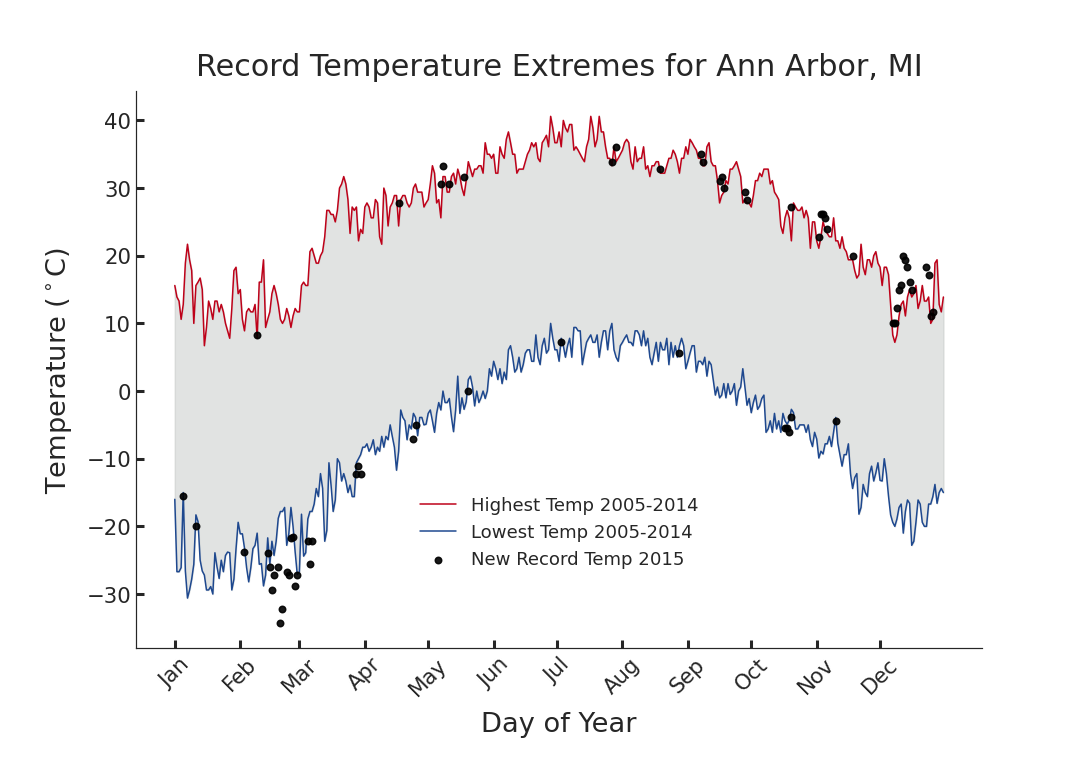

2015 Record Max Temps:  37
2015 Record Min Temps:  32
2015 Total Days with Record-Breaking Temps:  68 	 18.6%


,Day of Year,Temp (C) 2005-2014,Temp (C) 2015
0,Jan-01,15.6,1.1
1,Jan-02,13.9,3.9
2,Jan-03,13.3,3.9
3,Jan-04,10.6,4.4
4,Jan-05,12.8,2.8
...,...,...,...
360,Dec-27,18.9,8.3
361,Dec-28,19.4,6.1
362,Dec-29,12.8,10.0
363,Dec-30,11.7,6.7


In [5]:
%matplotlib notebook

import matplotlib.pyplot as plt
import seaborn as sns

tmax = pd.merge(tmax_by_day, tmax_2015, how='inner', left_index=True, right_index=True, sort=False, suffixes=(' 2005-2014', ' 2015')).reset_index()  ## This is overkill to use "merge" but good practice
tmin = pd.merge(tmin_by_day, tmin_2015, how='inner', left_index=True, right_index=True, sort=False, suffixes=(' 2005-2014', ' 2015')).reset_index()

new_max = tmax['Temp (C) 2015'] > tmax['Temp (C) 2005-2014']
new_min = tmin['Temp (C) 2015'] < tmin['Temp (C) 2005-2014']

month_abbrevs = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fom_ind = [number for number, day in enumerate(tmax['Day of Year']) if '01' in day]  ## I don't have to call 'tmax.index' to get the index values corresponding to the first of the month (fom)
                                                                                     ## because 'enumerate' and 'tmax.index' are both 'range(365)'

sns.set_style('white')
sns.set_style('ticks')
sns.set_style({'xtick.direction': 'in', 'ytick.direction': 'in'})

fig = plt.figure(figsize=(10,7))
ax  = fig.add_subplot()

ax.plot(tmax.index.to_numpy(), tmax['Temp (C) 2005-2014'], color='xkcd:scarlet', linewidth=1., label='Highest Temp 2005-2014')
ax.plot(tmax.index.to_numpy(), tmin['Temp (C) 2005-2014'], color='xkcd:cobalt', linewidth=1., label='Lowest Temp 2005-2014')

ax.fill_between(tmax.index.to_numpy(), tmin['Temp (C) 2005-2014'], tmax['Temp (C) 2005-2014'], color='xkcd:silver', alpha=0.5)

ax.scatter(tmax.index[new_max].to_numpy(), tmax[new_max]['Temp (C) 2015'], s=18, c='black', alpha=0.9, zorder=100, label='New Record Temp 2015')
ax.scatter(tmin.index[new_min].to_numpy(), tmin[new_min]['Temp (C) 2015'], s=18, c='black', alpha=0.9, zorder=100)

ax.legend(loc='lower center', frameon=False, borderaxespad=4, fontsize=12)
ax.set_xticks(fom_ind, month_abbrevs, rotation=45)
ax.tick_params(axis='both', labelsize=14, width=2, length=5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Day of Year', labelpad=8, fontsize=18)
ax.set_ylabel('Temperature ($^\circ$C)', labelpad=8, fontsize=18)
ax.set_title('Record Temperature Extremes for Ann Arbor, MI', pad=10, fontsize=20)
fig.subplots_adjust(bottom=0.15) ## Adjusts space between egde of figure and x-axis
#plt.savefig('Record_Temperature_Extremes_Ann_Arbor_MI.pdf')

plt.show()

print('2015 Record Max Temps: ', len(tmax[new_max]))
print('2015 Record Min Temps: ', len(tmin[new_min]))

print('2015 Total Days with Record-Breaking Temps: ', len(set(tmax.index[new_max].to_list() + tmin.index[new_min].to_list())), '\t', \
     str('%.1f' % (len(set(tmax.index[new_max].to_list() + tmin.index[new_min].to_list()))/365.*100.))+'%')

tmax